In [41]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
# load the dataset
df=pd.read_csv("uber.csv")
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,52:06.0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,04:56.0,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,45:00.0,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,22:21.0,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,47:00.0,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [43]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [45]:
# Getting the percentage of missing values in each column
round(df.isnull().sum()/len(df)*100,2)

Unnamed: 0           0.0
key                  0.0
fare_amount          0.0
pickup_datetime      0.0
pickup_longitude     0.0
pickup_latitude      0.0
dropoff_longitude    0.0
dropoff_latitude     0.0
passenger_count      0.0
dtype: float64

In [46]:
# getting the unique values in each column
df.nunique()

Unnamed: 0           200000
key                    3600
fare_amount            1240
pickup_datetime      196629
pickup_longitude      71014
pickup_latitude       83773
dropoff_longitude     76836
dropoff_latitude      90526
passenger_count           8
dtype: int64

In [47]:
# Dropping the Missing or Null Values if any 
df.dropna(inplace=True)
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,52:06.0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,04:56.0,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,45:00.0,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,22:21.0,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,47:00.0,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [48]:
# Finding the unique values in passenger_count column
df["passenger_count"].unique()

array([  1,   3,   5,   2,   4,   6,   0, 208])

In [49]:
# Finding the frequency of each unique value in passenger_count column
df["passenger_count"].value_counts()

passenger_count
1      138425
2       29428
5       14009
3        8881
4        4276
6        4271
0         708
208         1
Name: count, dtype: int64

In [50]:
df["passenger_count"]=df["passenger_count"].astype("str")
df["passenger_count"].dtype


dtype('O')

In [51]:
# dropping the values 0 and 208 as they are not valid values for passenger_count
df=df[~df["passenger_count"].isin(["0","208"])]


In [52]:
# checking the value counts again
df["passenger_count"].value_counts()

passenger_count
1    138425
2     29428
5     14009
3      8881
4      4276
6      4271
Name: count, dtype: int64

In [53]:
# resetting the index after dropping the rows
df.reset_index(drop=True, inplace=True)

In [54]:
# converting the pickup_datetime column datatype to datatime Datatype
df["pickup_datetime"]=pd.to_datetime(df["pickup_datetime"])

# Creating new Column Hour from pickup_datetime column
df["Hour"]=df["pickup_datetime"].dt.hour
df["Hour"].value_counts().sort_index()

# Creating new Column Time of the Day to Cetegorise the Hours

df['Time of the Day'] = df['Hour'].apply(
    lambda x: 'Morning' if 5 <= x < 12 else 
              'Afternoon' if 12 <= x < 17 else 
              'Evening' if 17 <= x < 21 else 
              'Night'
)
df["Time of the Day"].value_counts()  # finding the frequency of each unique value in Time of the Day column

Time of the Day
Night        55893
Morning      49935
Afternoon    47440
Evening      46022
Name: count, dtype: int64

In [55]:
# Function to convert latitude and longitude to distance in kilometers using Haversine formula
import math
def haversine_distance(lat1, lon1, lat2, lon2):
    # Radius of Earth in kilometers
    R = 6371.0

    # Convert latitude and longitude from degrees to radians
    lat1_rad = math.radians(lat1)
    lon1_rad = math.radians(lon1)
    lat2_rad = math.radians(lat2)
    lon2_rad = math.radians(lon2)

    # Differences
    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad

    # Haversine formula
    a = math.sin(dlat / 2)**2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    # Distance in kilometers
    distance = R * c

    return distance

In [56]:
# Applying the haversine_distance function to each row in the dataframe to calculate trip distance
df["Trip Distance (in Km)"] = df.apply(
    lambda val: haversine_distance(val["pickup_latitude"], val["pickup_longitude"], val["dropoff_latitude"], val["dropoff_longitude"]),
    axis=1
)
df["Trip Distance (in Km)"]=round(df["Trip Distance (in Km)"],2)


In [57]:
df.drop(columns=["Unnamed: 0","key","pickup_latitude","pickup_longitude","dropoff_latitude","dropoff_longitude"], inplace=True)

In [58]:


#  Declaring the x and the y variables
features=["Hour","Trip Distance (in Km)"]
X=df[features]
y=df["fare_amount"]


In [59]:
# Getting the correlation between the numerical features
num_df=df.select_dtypes(exclude=['object'])
num_df.corr().round(3)

,fare_amount,pickup_datetime,Hour,Trip Distance (in Km)
fare_amount,1.000,0.123,-0.021,0.025
pickup_datetime,0.123,1.000,0.002,0.027
Hour,-0.021,0.002,1.000,-0.001
Trip Distance (in Km),0.025,0.027,-0.001,1.000


In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X_const=add_constant(X)

In [61]:
vif_data=pd.DataFrame()
vif_data["Feature"]=X.columns
vif_data["VIF"]=[variance_inflation_factor(X_const.values,i+1) for i in range(len(X.columns))]
vif_data

,Feature,VIF
0,Hour,1.0
1,Trip Distance (in Km),1.0


In [62]:
num_df.drop(columns=["pickup_datetime","Hour"], inplace=True)

# Outlier Detection and Cleaning

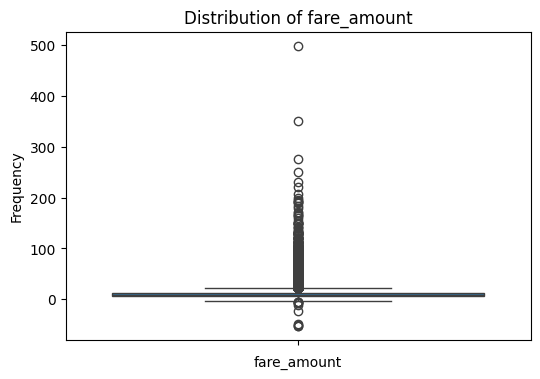

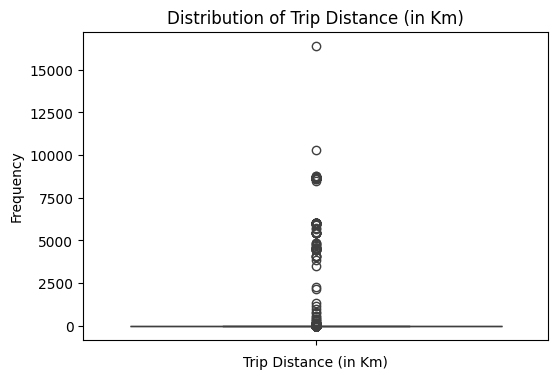

In [66]:
for i in num_df.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(num_df[i])
    plt.title(f'Distribution of {i}')
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.show()

In [64]:
for i in range (15):
    for col in ["Trip Distance (in Km)","fare_amount"]:
        Q1=df[col].quantile(0.25)
        Q2=df[col].quantile(0.5)
        Q3=df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound= Q1 - 1.5 * IQR
        upper_bound= Q3 + 1.5 * IQR
        df=df[(df[col]>=lower_bound) & (df[col]<=upper_bound)]

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 161039 entries, 0 to 199288
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype              
---  ------                 --------------   -----              
 0   fare_amount            161039 non-null  float64            
 1   pickup_datetime        161039 non-null  datetime64[ns, UTC]
 2   passenger_count        161039 non-null  object             
 3   Hour                   161039 non-null  int32              
 4   Time of the Day        161039 non-null  object             
 5   Trip Distance (in Km)  161039 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(2), int32(1), object(2)
memory usage: 8.0+ MB


# Regression 

In [67]:
from sklearn.ensemble import GradientBoostingRegressor

In [68]:
# Importing train_test_split from sklearn to split the data into training and testing sets
from sklearn.model_selection import train_test_split

#  Splitting the Data into Training and Testing Sets in ratio of 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [69]:
# Creating the Gradient Boosting Regressor model
gbr=GradientBoostingRegressor(
    learning_rate=0.1,
    max_depth=5,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=100,
    random_state=42
)

In [70]:
gbr.fit(X_train, y_train)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,5
,min_impurity_decrease,0.0
,init,None


In [71]:
pred_y=gbr.predict(X_test)

In [72]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, pred_y)
mae = mean_absolute_error(y_test, pred_y)   
r2 = r2_score(y_test, pred_y)

In [73]:
print(f'Mean Squared Error: {mse}\nMean Absolute Error: {mae}\nR^2 Score: {r2}')

Mean Squared Error: 24.366596160136286
Mean Absolute Error: 2.4230726009161563
R^2 Score: 0.7420561124183807


In [74]:
from xgboost import XGBRegressor

In [75]:
xgb_reg = XGBRegressor(
    objective='reg:squarederror',
    learning_rate=0.1,
    n_estimators=100,
    random_state=42,
)

In [76]:
xgb_reg.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [77]:
pred_y=xgb_reg.predict(X_test)

In [78]:
print(r2_score(y_test,pred_y))

0.7098104271714063
